In [3]:
#task 1 import module

In [4]:
import pandas as pd 
import numpy as np 

In [5]:
#Modules are imported.

In [6]:
#Task 2

In [7]:
#importing covid19 dataset

In [8]:
df=pd.read_csv("covid19_Confirmed_dataset.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
#Let's check the shape of the dataframe

In [10]:
df.shape

(266, 104)

In [12]:
# Delete the useless columns

In [13]:
df.drop(["Lat","Long"],axis=1,inplace=True)

In [14]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [15]:
#Aggregating the rows by the country

In [16]:
aggregating=df.groupby("Country/Region").sum()

In [17]:
aggregating.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [18]:
aggregating.shape

(187, 100)

In [19]:
#Visualizing data related to a country for example China

In [20]:
#visualization always helps for better understanding of our data

In [22]:
import matplotlib.pyplot as plt 

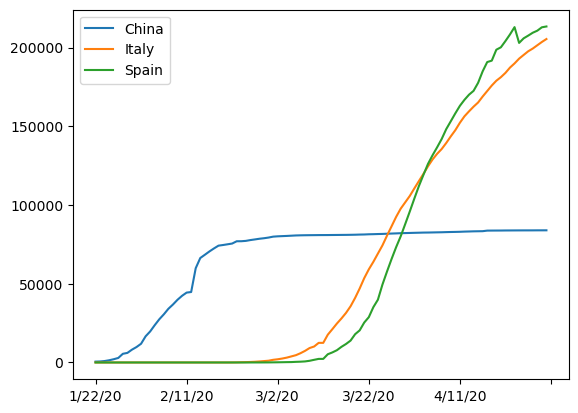

In [23]:
aggregating.loc["China"].plot()
aggregating.loc["Italy"].plot()
aggregating.loc["Spain"].plot()
plt.legend()

In [24]:
#Calculating a good measure

In [25]:
#we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

<AxesSubplot:>

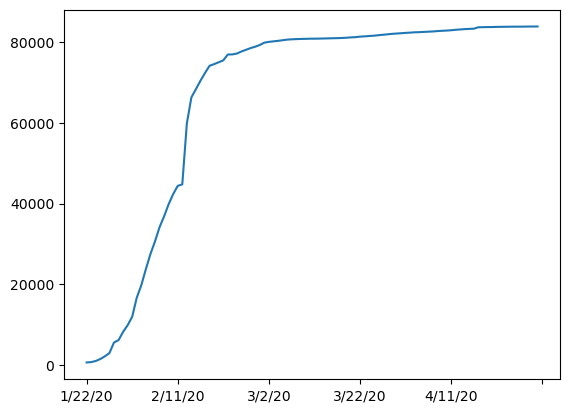

In [26]:
aggregating.loc['China'].plot()

<AxesSubplot:>

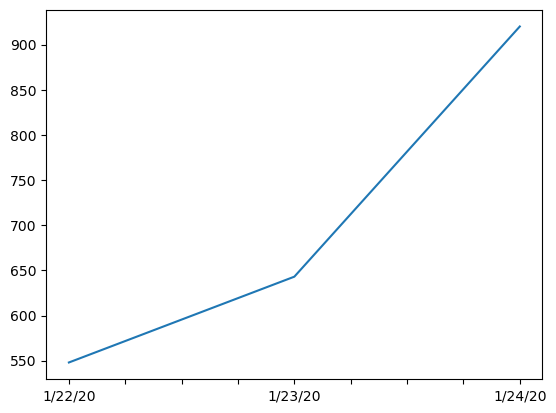

In [27]:
aggregating.loc['China'][:3].plot()

In [28]:
#caculating the first derivative of the curve

<AxesSubplot:>

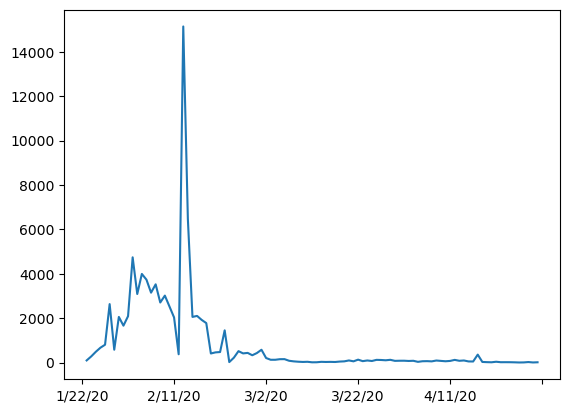

In [29]:
aggregating.loc['China'].diff().plot()

In [30]:
#find maxmimum infection rate for China

In [31]:
aggregating.loc['China'].diff().max()

15136.0

In [32]:
aggregating.loc['Italy'].diff().max()

6557.0

In [33]:
aggregating.loc['Spain'].diff().max()

9630.0

In [34]:
#find maximum infection rate for all of the countries.

In [35]:
countries=list(aggregating.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(aggregating.loc[c].diff().max())
aggregating["max_infection_rates"]=max_infection_rates

In [36]:
aggregating.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [37]:
#create a new dataframe with only needed column

In [38]:
data=pd.DataFrame(aggregating["max_infection_rates"])

In [39]:
data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


Task4:
Importing the WorldHappinessReport.csv dataset
selecting needed columns for our analysis
join the datasets
calculate the correlations as the result of our analysis

In [40]:
#Task4:
#Importing the WorldHappinessReport.csv dataset
#selecting needed columns for our analysis
#join the datasets
#calculate the correlations as the result of our analysis

In [41]:
#importing the dataset

In [43]:
happiness=pd.read_csv("worldwide_happiness_report.csv")

In [44]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [45]:
#let's drop the useless columns

In [46]:
cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [47]:
happiness.drop(cols,axis=1,inplace=True)
happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [48]:
#changing the indices of the dataframe

In [49]:
happiness.set_index("Country or region",inplace=True)
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [50]:
#now let's join two dataset we have prepared

In [51]:
#Corona Dataset :

In [52]:
data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [54]:
#wolrd happiness report Dataset :

In [55]:
happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [56]:
final=data.join(happiness,how="inner")
final.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [57]:
#correlation matrix

In [58]:
final.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [59]:
#Visualization of the results
#our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can 
#understand what you get out of our analysis

In [60]:
final.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [61]:
#Plotting GDP vs maximum Infection rate

In [63]:
import seaborn as sns

In [65]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

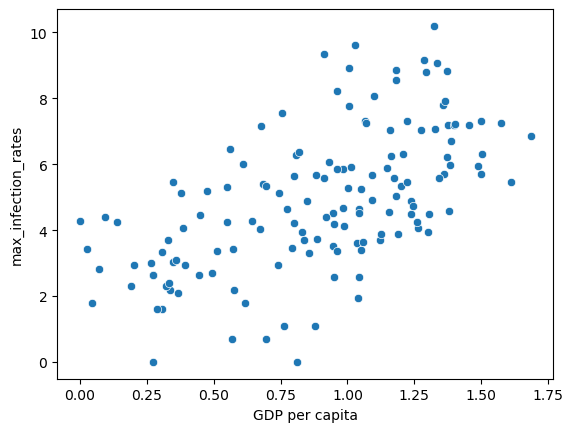

In [66]:
x=final["GDP per capita"]
y=final["max_infection_rates"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

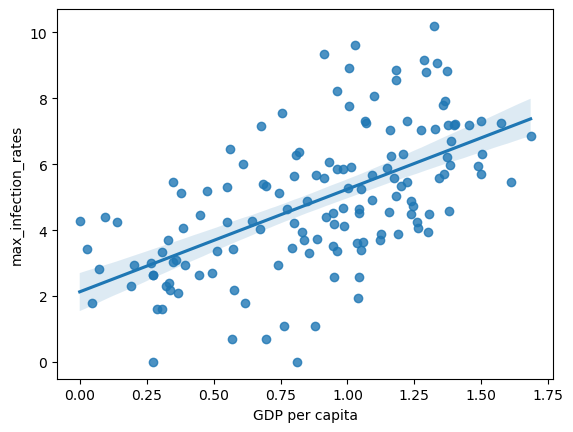

In [67]:
sns.regplot(x,np.log(y))

In [68]:
#Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rates'>

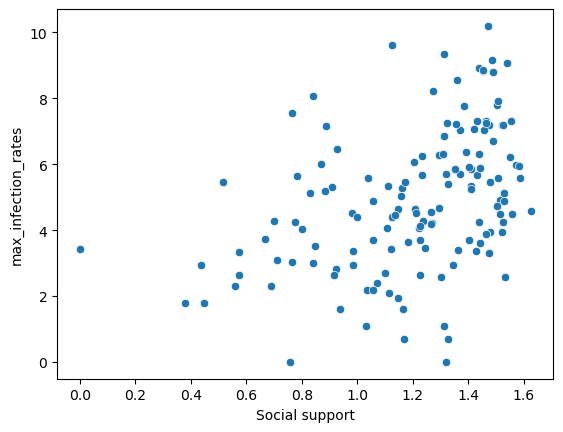

In [69]:
x=final["Social support"]
y=final["max_infection_rates"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rates'>

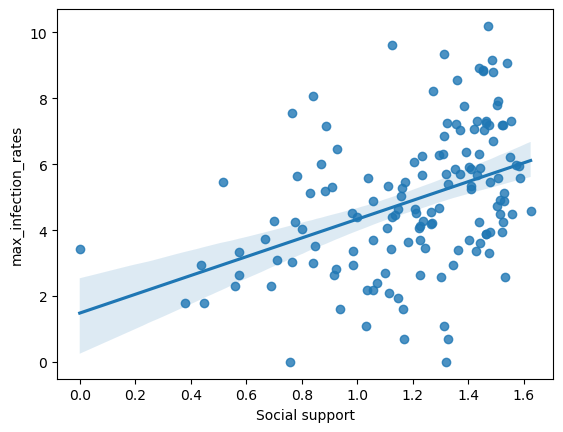

In [70]:
sns.regplot(x,np.log(y))

In [71]:
#Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

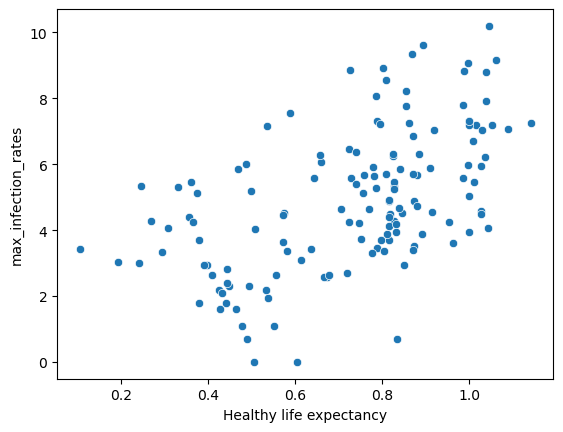

In [72]:
x=final["Healthy life expectancy"]
y=final["max_infection_rates"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

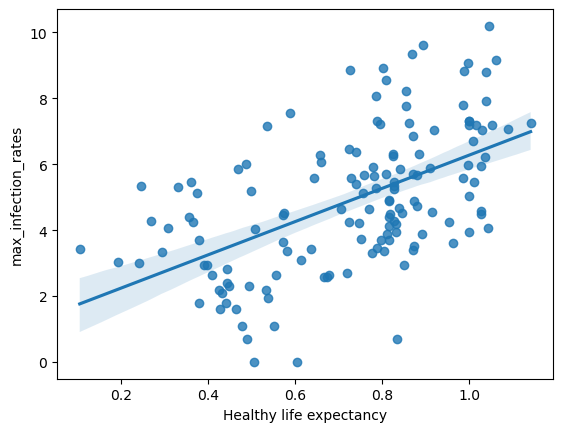

In [73]:
sns.regplot(x,np.log(y))

In [74]:
#Plotting Freedom to make life choices vs maximum Infection rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

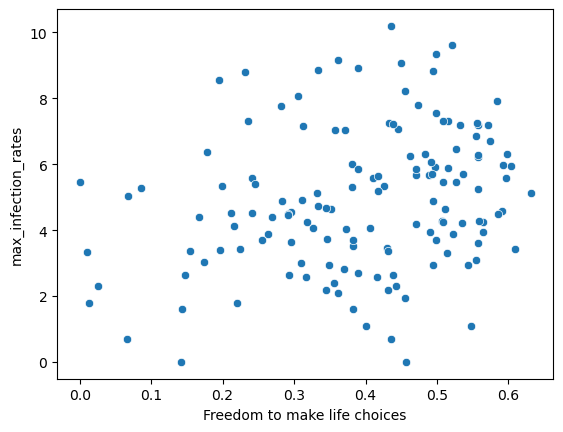

In [75]:
x=final["Freedom to make life choices"]
y=final["max_infection_rates"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

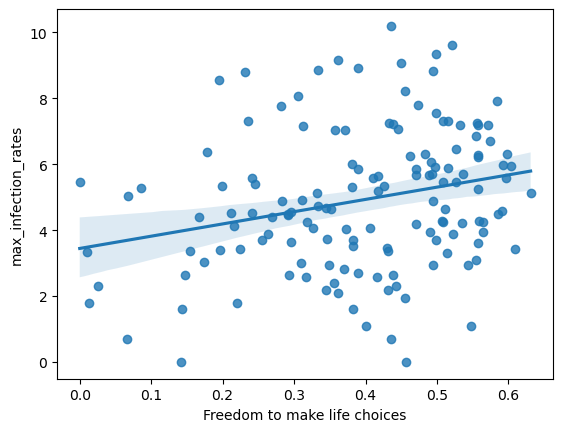

In [76]:
sns.regplot(x,np.log(y))